<a href="https://colab.research.google.com/github/neenjo/ai-and-analytics-p4/blob/main/Updated_of_Advanced_RP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source Citation:
Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125. DOI:
*italicized text*


# Loader

Loading Data from Google Drive

In [ ]:

from numpy.random import seed
seed(1)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading Data

In [ ]:
path="/content/drive/My Drive/Study/s2 2020/Research Project Personal/Research Project/Data/drugLib_raw/drugLibTrain_raw.tsv"

In [ ]:
import pandas as pd
raw_df=pd.read_csv(path,sep='\t')

In [ ]:
raw_df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


# Feature Selection

In [ ]:
basic_df=raw_df.iloc[:,[2,3,4,8]]

In [ ]:
basic_df.head(-5)

,rating,effectiveness,sideEffects,commentsReview
0,4,Highly Effective,Mild Side Effects,"monitor blood pressure , weight and asses for ..."
1,1,Highly Effective,Severe Side Effects,"I Hate This Birth Control, I Would Not Suggest..."
2,10,Highly Effective,No Side Effects,I took 2 pills at the onset of my menstrual cr...
3,3,Marginally Effective,Mild Side Effects,I was given Prilosec prescription at a dose of...
4,2,Marginally Effective,Severe Side Effects,See above
...,...,...,...,...
3097,8,Considerably Effective,No Side Effects,"I take one pill in the morning, and one at night."
3098,10,Highly Effective,No Side Effects,My son had been having terrible problems with ...
3099,8,Considerably Effective,Moderate Side Effects,The patient was diagnosed with ADHD after desc...
3100,7,Considerably Effective,Mild Side Effects,"I started with a low dose, then increased the ..."


DIsplaying Count

In [ ]:
basic_df['effectiveness'].value_counts()

Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: effectiveness, dtype: int64

In [ ]:
basic_df['sideEffects'].value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [ ]:
#basic_df['condition'].value_counts()

In [ ]:
basic_df['commentsReview'].value_counts()

none                                                                                                                                                                                                                                6
None                                                                                                                                                                                                                                4
see above                                                                                                                                                                                                                           3
take one pill daily                                                                                                                                                                                                                 3
The pills are administered once a day, daily, for as long as you think it's wort

In [ ]:
basic_df.shape

(3107, 4)

Dropping all rows which has see above

In [ ]:
basic_df=basic_df.drop(basic_df[basic_df['commentsReview']=="see above"].index)

In [ ]:
basic_df.shape

(3104, 4)

3 rows deleted

Need to create a Pipeline for all the following steps

Categorising review ratings as **Negative 0 and Positive 1**

In [ ]:
def rank_bin(array):
  y_rank = []
  for i in array:
    if i <= 5: # Negative Rating Cut Off (Inclusive)
      y_rank.append(0)
#    elif i >= 7: # Positive Rating Cut Off (Inclusive)
#      y_rank.append(2)
    else:  # Neutral Rating Cut off 
      y_rank.append(1)
  return y_rank

basic_df["rank_bin"] = rank_bin(basic_df["rating"])
basic_df.rank_bin.value_counts() 

1    2285
0     819
Name: rank_bin, dtype: int64

In [ ]:
basic_df.head()

,rating,effectiveness,sideEffects,commentsReview,rank_bin
0,4,Highly Effective,Mild Side Effects,"monitor blood pressure , weight and asses for ...",0
1,1,Highly Effective,Severe Side Effects,"I Hate This Birth Control, I Would Not Suggest...",0
2,10,Highly Effective,No Side Effects,I took 2 pills at the onset of my menstrual cr...,1
3,3,Marginally Effective,Mild Side Effects,I was given Prilosec prescription at a dose of...,0
4,2,Marginally Effective,Severe Side Effects,See above,0


Train Test Split with Stratisfied sampling

In [ ]:
basic_df["rank_bin"].value_counts(normalize=True)

1    0.736147
0    0.263853
Name: rank_bin, dtype: float64

Resetting Index

In [ ]:
basic_df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(basic_df, basic_df['rank_bin']):
    strat_train_set = basic_df.loc[train_index]
    strat_test_set = basic_df.loc[test_index]

In [ ]:
strat_train_set["rank_bin"].value_counts(normalize=True)

1    0.736188
0    0.263812
Name: rank_bin, dtype: float64

In [ ]:
strat_test_set["rank_bin"].value_counts(normalize=True)

1    0.736052
0    0.263948
Name: rank_bin, dtype: float64

Thus the ratio of rank_bin is same in both train and test data

# Classification Performance

In [ ]:
def get_performance_class(model,X,y):
  y_pred = model.predict(X)
  y_pred=get_category(y_pred)
  from sklearn.metrics import confusion_matrix
  print(confusion_matrix(y, y_pred))
  from sklearn.metrics import roc_auc_score
  print(roc_auc_score(y, y_pred))
  from sklearn.metrics import classification_report
  print(classification_report(y, y_pred))

# Custom Drug StopWords

In [ ]:

drug_stopwords=raw_df['urlDrugName'].value_counts().index.values


In [ ]:
drug_stopwords

array(['lexapro', 'prozac', 'retin-a', 'zoloft', 'paxil', 'propecia',
       'synthroid', 'doxycycline', 'cymbalta', 'effexor', 'wellbutrin',
       'chantix', 'neurontin', 'ambien', 'lipitor', 'effexor-xr',
       'lamictal', 'accutane', 'imitrex', 'renova', 'nexium', 'flonase',
       'adipex-p', 'differin', 'topamax', 'vyvanse', 'zyrtec', 'xanax',
       'retin-a-micro', 'seroquel', 'wellbutrin-xl', 'nuvaring',
       'tramadol', 'cipro', 'valtrex', 'lyrica', 'citalopram', 'provigil',
       'prevacid', 'singulair', 'prinivil', 'allegra', 'flexeril',
       'augmentin', 'levoxyl', 'spironolactone', 'prednisone',
       'seasonique', 'claritin', 'lunesta', 'prilosec', 'elavil',
       'minocycline', 'premarin', 'celebrex', 'metformin', 'vicodin',
       'ortho-tri-cyclen', 'prempro', 'yasmin', 'mobic', 'protonix',
       'avita', 'amoxil', 'metrogel', 'adderall', 'tazorac', 'zomig',
       'strattera', 'crestor', 'celexa', 'naproxen', 'biaxin', 'ativan',
       'ultram', 'lamisil', '

# Text Preprocessing

In [ ]:
import re,unicodedata,inflect
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Regex for removing non-alphanumeric characters and spaces
remove_special_char = re.compile('r[^a-z\d]',re.IGNORECASE)

# Regex to replace all numerics
replace_numerics = re.compile(r'\d+',re.IGNORECASE)

# F&#K Unicode Emojis
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)

# Load NLTK stop words
stop_words = nltk.corpus.stopwords.words('english')
print ("NLTK stopword list length: ",len(stop_words),'words')

# Add custom drug stopwords
stop_words.extend(drug_stopwords)
print ("Added custom stopwords")
print ("New stopword list length: ",len(stop_words),'words')



#######################################################
#NORMALIZER, RUNS IN PREPROCESS
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
      if word.isdigit():
        new_word = p.number_to_words(word)
        new_words.append(word)
      else:
        new_words.append(word)
    return new_words


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words


# Define Text-PreProcessing function
#################################################################
def preprocess_text(text, remove_stopwords = True, perform_stemming = True):
    #first clean text then go to lowercase and split.
    text = text.replace(r"http\S+", "")
    text = text.replace(r"http", "")
    text = text.replace(r"(\d)", "")
    text = text.replace(r"@\S+", "")
    text = text.replace(r"@", "at")
#    text = remove_special_char.sub('', text)
    text = replace_numerics.sub(' n ', text)
    text = emoji_pattern.sub('', text)
    text = text.replace( r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)","")
    text = text.replace( r"(\-)|(\\)|(\s{2,})"," ")
    text = text.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    text = text.replace(r"(&#n;)", "")
    text = text.replace(' +',' ')
    
    # per/wordprocessing
    textlist = text.lower().split()
    textlist = normalize(textlist)
    text = ' '.join(textlist) 
    #stopword removal (nltk + custom drug stopwords)
#    if(remove_stopwords):
#        textlist = [word for word in textlist if word not in stop_words]
  
    # stemming  
    if(perform_stemming):
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = ' '.join(stemmed_words)
        
    return text




NLTK stopword list length:  179 words
Added custom stopwords
New stopword list length:  681 words


In [ ]:
preprocess_text("I was taking 100mg ambien each night for loudly")

'take n mg night loud'

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Download this on first time use
#nltk.download()

# Predict rating Category from counts: RNN LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer

Train review feature

In [ ]:
strat_train_set.head(20)

,rating,effectiveness,sideEffects,commentsReview,rank_bin
1542,10,Highly Effective,No Side Effects,I had a heart scan after experiencing exercise...,1
1888,9,Highly Effective,Mild Side Effects,Prescribed for adult ADD. I take one per day -...,1
2395,7,Moderately Effective,Moderate Side Effects,After starting at.325mg-1.5 dose and now up to...,1
1362,8,Considerably Effective,Mild Side Effects,Taken on a daily basis at the same time everyd...,1
2856,8,Considerably Effective,No Side Effects,I took it once a day.. in the beginning it wor...,1
730,10,Highly Effective,No Side Effects,"I took in the am when nauseated, I would take ...",1
1368,7,Considerably Effective,Mild Side Effects,Excellent in treating GERD.,1
888,8,Highly Effective,Moderate Side Effects,I was put on Aromasin after 6 months on Tamoxi...,1
1190,7,Considerably Effective,No Side Effects,He takes a capsule in the morning and one at n...,1
855,1,Ineffective,Severe Side Effects,I stopped taking the medicine after side effec...,0


In [ ]:
strat_test_set

,rating,effectiveness,sideEffects,commentsReview,rank_bin
214,8,Highly Effective,Moderate Side Effects,"20mg daily for 3 months, taken as one pill eac...",1
1814,6,Considerably Effective,No Side Effects,I believe you mean the treatment of the diseas...,1
2347,9,Highly Effective,Mild Side Effects,the doctors started me off on high dosage and ...,1
3035,9,Highly Effective,Moderate Side Effects,it came in 4mg tablets that dissolved under my...,1
457,10,Highly Effective,No Side Effects,Take 2 tablets once per day.,1
...,...,...,...,...,...
1160,8,Highly Effective,Mild Side Effects,once a night mixed with Vit. C serum,1
195,10,Highly Effective,Mild Side Effects,take by mouth twice daily for 10 days,1
1097,10,Highly Effective,Severe Side Effects,I applied Tretinoin every evening to entire fa...,1
530,10,Highly Effective,Mild Side Effects,i take 50 mg tablet. one a day in the morning ...,1


In [ ]:
X_train_review_df=strat_train_set[['commentsReview','rating']]

In [ ]:
X_train_review_df

,commentsReview,rating
1542,I had a heart scan after experiencing exercise...,10
1888,Prescribed for adult ADD. I take one per day -...,9
2395,After starting at.325mg-1.5 dose and now up to...,7
1362,Taken on a daily basis at the same time everyd...,8
2856,I took it once a day.. in the beginning it wor...,8
...,...,...
1669,I took 1 x 25mg per day which built up to 4 x ...,1
1334,I took this drug as a prophylactic treatment f...,6
3096,The patient was diagnosed with ADHD after desc...,8
1051,"Please note ""treatment side effects""",8


In [ ]:
X_train_review_df

,commentsReview,rating
1542,I had a heart scan after experiencing exercise...,10
1888,Prescribed for adult ADD. I take one per day -...,9
2395,After starting at.325mg-1.5 dose and now up to...,7
1362,Taken on a daily basis at the same time everyd...,8
2856,I took it once a day.. in the beginning it wor...,8
...,...,...
1669,I took 1 x 25mg per day which built up to 4 x ...,1
1334,I took this drug as a prophylactic treatment f...,6
3096,The patient was diagnosed with ADHD after desc...,8
1051,"Please note ""treatment side effects""",8


In [ ]:
y_train_review_df=strat_train_set['rank_bin']

In [ ]:
y_train_review_df

1542    1
1888    1
2395    1
1362    1
2856    1
       ..
1669    0
1334    1
3096    1
1051    1
1432    1
Name: rank_bin, Length: 2172, dtype: int64

Test review features

In [ ]:
X_test_review_df=strat_test_set[['commentsReview','rating']]

In [ ]:
X_test_review_df

,commentsReview,rating
214,"20mg daily for 3 months, taken as one pill eac...",8
1814,I believe you mean the treatment of the diseas...,6
2347,the doctors started me off on high dosage and ...,9
3035,it came in 4mg tablets that dissolved under my...,9
457,Take 2 tablets once per day.,10
...,...,...
1160,once a night mixed with Vit. C serum,8
195,take by mouth twice daily for 10 days,10
1097,I applied Tretinoin every evening to entire fa...,10
530,i take 50 mg tablet. one a day in the morning ...,10


In [ ]:
y_test_review_df=strat_test_set['rank_bin']

In [ ]:
y_test_review_df

214     1
1814    1
2347    1
3035    1
457     1
       ..
1160    1
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

Preprocessing text

In [ ]:
#Train Data
from tqdm import tqdm#For progress bar

for i, row in tqdm(X_train_review_df.iterrows()):
  #print(preprocess_text(str(row['commentsReview'])))
  X_train_review_df.at[i,'commentsReview']=preprocess_text(str(row['commentsReview']))
#    df.at[i,'ifor'] = ifor_val

2172it [00:02, 1031.55it/s]


In [ ]:
#Test Data
for i, row in tqdm(X_test_review_df.iterrows()):
  #print(preprocess_text(str(row['commentsReview'])))
  X_test_review_df.at[i,'commentsReview']=preprocess_text(str(row['commentsReview']))
#    df.at[i,'ifor'] = ifor_val

932it [00:00, 1010.45it/s]


In [ ]:
X_train_review_df

,commentsReview,rating
1542,heart scan experienc exerciseinduc arrhythmia ...,10
1888,prescrib adult add take one per day n mg,9
2395,start n mg n n dose n mg n n mg estrogenproges...,7
1362,taken daili basi time everyday take everyday t...,8
2856,took day begin work great time didnt seem effe...,8
...,...,...
1669,took n x n mg per day built n x n mg per day n...,1
1334,took drug prophylact treatment chronic pain he...,6
3096,patient diagnos adhd describ pattern focus mem...,8
1051,pleas note treatment side effect,8


In [ ]:
y_train_review_df

1542    1
1888    1
2395    1
1362    1
2856    1
       ..
1669    0
1334    1
3096    1
1051    1
1432    1
Name: rank_bin, Length: 2172, dtype: int64

Converting text to **lower case**

In [ ]:
X_train_review_df['commentsReview']=X_train_review_df['commentsReview'].str.lower()
X_test_review_df['commentsReview']=X_test_review_df['commentsReview'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train_review_df.head()

,commentsReview,rating
1542,heart scan experienc exerciseinduc arrhythmia ...,10
1888,prescrib adult add take one per day n mg,9
2395,start n mg n n dose n mg n n mg estrogenproges...,7
1362,taken daili basi time everyday take everyday t...,8
2856,took day begin work great time didnt seem effe...,8


Tokenizing and padding

In [ ]:
from keras.preprocessing import sequence

MAX_SEQUENCE_LENGTH=100
VOC_SIZE=1000


In [ ]:
tokenizer = Tokenizer(num_words=VOC_SIZE, split=' ',oov_token="<OOV>")

In [ ]:
X_train_review_df['commentsReview']=X_train_review_df['commentsReview'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test_review_df['commentsReview']=X_test_review_df['commentsReview'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tokenizer.fit_on_texts(X_train_review_df['commentsReview'].values)

In [ ]:
tokenizer.word_index

{'<OOV>': 1,
 'n': 2,
 'take': 3,
 'day': 4,
 'mg': 5,
 'effect': 6,
 'one': 7,
 'week': 8,
 'time': 9,
 'drug': 10,
 'use': 11,
 'medic': 12,
 'month': 13,
 'year': 14,
 'took': 15,
 'pill': 16,
 'treatment': 17,
 'start': 18,
 'work': 19,
 'would': 20,
 'pain': 21,
 'doctor': 22,
 'prescrib': 23,
 'side': 24,
 'daili': 25,
 'dose': 26,
 'night': 27,
 'everi': 28,
 'get': 29,
 'help': 30,
 'tablet': 31,
 'morn': 32,
 'stop': 33,
 'taken': 34,
 'feel': 35,
 'hour': 36,
 'tri': 37,
 'sever': 38,
 'also': 39,
 'need': 40,
 'first': 41,
 'two': 42,
 'back': 43,
 'even': 44,
 'per': 45,
 'sleep': 46,
 'increas': 47,
 'depress': 48,
 'still': 49,
 'like': 50,
 'dosag': 51,
 'go': 52,
 'symptom': 53,
 'much': 54,
 'appli': 55,
 'skin': 56,
 'went': 57,
 'blood': 58,
 'well': 59,
 'twice': 60,
 'could': 61,
 'continu': 62,
 'felt': 63,
 'sinc': 64,
 'better': 65,
 'problem': 66,
 'result': 67,
 'dont': 68,
 'acn': 69,
 'notic': 70,
 'never': 71,
 'anxieti': 72,
 'control': 73,
 'face': 74,
 '

In [ ]:
max_words=MAX_SEQUENCE_LENGTH
X_train_review_sequence = tokenizer.texts_to_sequences(X_train_review_df['commentsReview'])
X_train_review_sequence = sequence.pad_sequences(X_train_review_sequence,maxlen=max_words)

X_test_review_sequence = tokenizer.texts_to_sequences(X_test_review_df['commentsReview'])
X_test_review_sequence = sequence.pad_sequences(X_test_review_sequence,maxlen=max_words)

In [ ]:
X_train_review_sequence

array([[  0,   0,   0, ...,   1,   1,  17],
       [  0,   0,   0, ...,   4,   2,   5],
       [  0,   0,   0, ...,  68,  35, 118],
       ...,
       [  0,   0,   0, ...,  12, 411,   6],
       [  0,   0,   0, ...,  17,  24,   6],
       [  0,   0,   0, ...,  65,  64, 145]], dtype=int32)

In [ ]:
X_train_review_sequence.shape

(2172, 100)

In [ ]:
X_test_review_sequence.shape

(932, 100)

Visualising Length of sentences

In [ ]:

len_arr=X_train_review_df['commentsReview'].apply(lambda row: len(row))

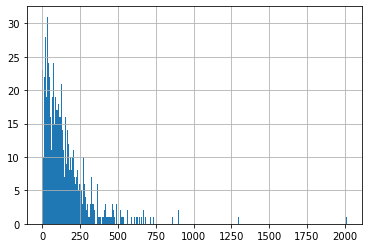

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.Series(len_arr).hist(bins=1000)
plt.show()


In [ ]:
len_arr.describe()

count    2172.000000
mean      149.904696
std       152.054039
min         0.000000
25%        53.000000
50%       108.000000
75%       195.000000
max      2011.000000
Name: commentsReview, dtype: float64

Most of the reviews are less than **500 words**

In [ ]:
y_train_review_sequence=y_train_review_df
y_test_review_sequence=y_test_review_df

In [ ]:
y_test_review_sequence

214     1
1814    1
2347    1
3035    1
457     1
       ..
1160    1
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

In [ ]:
y_train_review_sequence

1542    1
1888    1
2395    1
1362    1
2856    1
       ..
1669    0
1334    1
3096    1
1051    1
1432    1
Name: rank_bin, Length: 2172, dtype: int64

In [ ]:
X_train_review_sequence.shape

(2172, 100)

In [ ]:

# Convolution
kernel_size = 5
filters = 128
pool_size = 4


In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SpatialDropout1D,Conv1D,MaxPooling1D
embedding_size=50
vocabulary_size=VOC_SIZE
max_words=MAX_SEQUENCE_LENGTH
"""
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Dropout(0.15))
model.add(Conv1D(filters,kernel_size, padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(196, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()"""


model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(192, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(128,activation='relu'))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 100, 192)          186624    
_________________________________________________________________
dense (Dense)                (None, 100, 128)          24704     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 397,073
Trainable params: 397,073
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 32
num_epochs = 3
model.fit(X_train_review_sequence, y_train_review_sequence, validation_data=(X_test_review_sequence, y_test_review_sequence), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
68/68 [==============================] - 50s 675ms/step - loss: 0.6171 - accuracy: 0.7213 - val_loss: 0.5729 - val_accuracy: 0.7361
Epoch 2/3
68/68 [==============================] - 45s 666ms/step - loss: 0.5575 - accuracy: 0.7330 - val_loss: 0.5712 - val_accuracy: 0.7532
Epoch 3/3
68/68 [==============================] - 45s 665ms/step - loss: 0.4555 - accuracy: 0.8011 - val_loss: 0.5909 - val_accuracy: 0.7511


In [ ]:
res=model.predict(X_train_review_sequence)

In [ ]:
res

array([[0.77190137],
       [0.94857776],
       [0.5322946 ],
       ...,
       [0.9878513 ],
       [0.60071415],
       [0.8146366 ]], dtype=float32)

In [ ]:
def get_category(res):
  val=[]
  for i in res:
    if(i[0]<0.5):
      val.append(0)
    else:
      val.append(1)
  return val

In [ ]:
get_performance_class(model,X_train_review_sequence,y_train_review_sequence)

[[ 299  274]
 [  61 1538]]
0.7418330828495557
              precision    recall  f1-score   support

           0       0.83      0.52      0.64       573
           1       0.85      0.96      0.90      1599

    accuracy                           0.85      2172
   macro avg       0.84      0.74      0.77      2172
weighted avg       0.84      0.85      0.83      2172



In [ ]:
get_performance_class(model,X_test_review_sequence,y_test_review_sequence)

[[ 77 169]
 [ 63 623]]
0.6105856976937116
              precision    recall  f1-score   support

           0       0.55      0.31      0.40       246
           1       0.79      0.91      0.84       686

    accuracy                           0.75       932
   macro avg       0.67      0.61      0.62       932
weighted avg       0.72      0.75      0.73       932



In [ ]:
y_test_review_sequence

214     1
1814    1
2347    1
3035    1
457     1
       ..
1160    1
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

In [ ]:
y_test_pred_index=y_test_review_sequence

In [ ]:
pred_value=get_category(model.predict(X_test_review_sequence))

In [ ]:
i=0
for index, value in y_test_pred_index.items():
  print(y_test_pred_index[index],pred_value[i])
  y_test_pred_index[index]=pred_value[i]
  i=i+1


1 1
1 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
0 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
0 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 0
1 1
0 1
1 1
1 0
0 0
1 1
0 0
0 1
0 1
1 0
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
1 0
0 0
0 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
0 1
0 1
1 0
1 1
1 1
0 1
0 1
0 0
1 1
1 1
1 0
0 1
0 0
1 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 0
1 0
0 0
0 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
0 1
0 0
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 1
1 1
0 1
1 1
1 1
1 0
1 1
1 1
1 0
0 0
1 1
1 1
0 0
0 1
1 1
1 1
0 1
1 1
0 1
0 1
1 0
1 0
1 1
1 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1 1
1 1
1 1
0 1
1 0
1 1
1 0
0 0
1 1
1 1
1 0
1 1
0 1
0 1
1 1
1 1
1 0
1 1
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
1 0
1 1
1 1
0 0
0 0
1 0
1 1
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 0
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 0
0 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
0 0
0 0
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 0
0 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 0
1 1
0 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
0 0
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 0
0 1
0 1
1 0
1 1
1 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
1 0
0 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1


In [ ]:
y_test_pred_index

214     1
1814    0
2347    1
3035    1
457     1
       ..
1160    0
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

Copying train result

In [ ]:
y_train_pred_index=y_train_review_sequence

In [ ]:
train_pred_value=get_category(model.predict(X_train_review_sequence))

In [ ]:
i=0
for index, value in y_train_pred_index.items():
  print(y_train_pred_index[index],train_pred_value[i])
  y_train_pred_index[index]=train_pred_value[i]
  i=i+1

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
1 1
1 1
1 1
0 0
1 1
1 0
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 0
1 1
1 1
1 0
1 1
1 1
1 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
0 0
1 1
0 0
1 0
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
0 1
0 0
0 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 0
1 1
0 1
1 1
0 1
0 0
1 1
0 0
1 1
0 0
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
1 1
0 0
0 0
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
0 1
0 1
0 0
1 1
1 1
0 0
1 1
0 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
0 1
0 1
1 1
0 0
0 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
0 0
0 0
1 1
1 1
0 0
0 1
1 1
0 0
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0
1 1
1 1
0 0
1 1
1 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 0
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 0
0 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
0 0
1 0
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 0
0 1
0 0
1 1
1 1
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 0
0 0
0 1
0 0
1 1
0 0
0 0
1 1
1 1
0 0
1 1
0 0
1 1
0 0
0 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 

# Regression: Predict rating Category from counts: RNN LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer

Train review feature

In [ ]:
strat_train_set.head(20)

,rating,effectiveness,sideEffects,commentsReview,rank_bin
480,8,Considerably Effective,Mild Side Effects,1 mg pill taken daily for hair loss on the cro...,1
2819,2,Ineffective,Mild Side Effects,Took Imitrex for a 3 month period and still ha...,0
309,8,Considerably Effective,Mild Side Effects,once a day at night time for a period of 3 mon...,1
2293,1,Ineffective,Extremely Severe Side Effects,This drug should NOT be on the market!,0
1725,10,Highly Effective,No Side Effects,At the start of this disorder I thought I was ...,1
2075,7,Considerably Effective,Severe Side Effects,I chose to do everyday for 2 weeks without the...,1
1102,10,Highly Effective,Mild Side Effects,first week 1 pill per day while smoking contin...,1
48,10,Highly Effective,Mild Side Effects,I started on the medication 3yrs ago and still...,1
69,9,Highly Effective,No Side Effects,take your pill everyday at the same time. i f...,1
714,8,Considerably Effective,Moderate Side Effects,I was instructed by my doctor to take one sing...,1


In [ ]:
strat_train_set.iloc[11,3]

'pt started on 150mg daily for 1 week then increased to 300mg once daily. Pt continues on the regimen today (has been for years 5+)'

In [ ]:
X_train_review_df=strat_train_set[['commentsReview','rating']]

In [ ]:
X_train_review_df

,commentsReview,rating
480,1 mg pill taken daily for hair loss on the cro...,8
2819,Took Imitrex for a 3 month period and still ha...,2
309,once a day at night time for a period of 3 mon...,8
2293,This drug should NOT be on the market!,1
1725,At the start of this disorder I thought I was ...,10
...,...,...
1669,I took 1 x 25mg per day which built up to 4 x ...,1
843,I always take the pill at night with lots of w...,10
2119,I was taking 100mg ambien each night for appro...,8
3073,I had a cold for 6 days that would not go away...,9


In [ ]:
X_train_review_df

,commentsReview,rating
480,1 mg pill taken daily for hair loss on the cro...,8
2819,Took Imitrex for a 3 month period and still ha...,2
309,once a day at night time for a period of 3 mon...,8
2293,This drug should NOT be on the market!,1
1725,At the start of this disorder I thought I was ...,10
...,...,...
1669,I took 1 x 25mg per day which built up to 4 x ...,1
843,I always take the pill at night with lots of w...,10
2119,I was taking 100mg ambien each night for appro...,8
3073,I had a cold for 6 days that would not go away...,9


In [ ]:
y_train_review_df=strat_train_set['rating']

In [ ]:
y_train_review_df

480      8
2819     2
309      8
2293     1
1725    10
        ..
1669     1
843     10
2119     8
3073     9
2325    10
Name: rating, Length: 2638, dtype: int64

Test review features

In [ ]:
X_test_review_df=strat_test_set[['commentsReview','rating']]

In [ ]:
X_test_review_df

,commentsReview,rating
111,When my cholesterol was found to be slightly e...,1
2992,The treatment details are simply a taking one ...,9
3031,Treatment has been ongoing for several months ...,9
2686,My dotor precribed this for treatment of whipl...,3
2263,"I was experiencing hot flashes, mood swings an...",10
...,...,...
986,I began taking the product to stave off the on...,7
1779,"i started at a very low dose, to be worked up ...",1
2226,After being assessed by a psychiaterist using ...,7
2793,"It reduced the tingling sensation, and numbnes...",8


In [ ]:
y_test_review_df=strat_test_set['rating']

In [ ]:
y_test_review_df

111      1
2992     9
3031     9
2686     3
2263    10
        ..
986      7
1779     1
2226     7
2793     8
1726    10
Name: rating, Length: 466, dtype: int64

Preprocessing text

In [ ]:
#Train Data
from tqdm import tqdm#For progress bar

for i, row in tqdm(X_train_review_df.iterrows()):
  #print(preprocess_text(str(row['commentsReview'])))
  X_train_review_df.at[i,'commentsReview']=preprocess_text(str(row['commentsReview']))
#    df.at[i,'ifor'] = ifor_val

2638it [00:02, 958.64it/s]


In [ ]:
#Test Data
for i, row in tqdm(X_test_review_df.iterrows()):
  #print(preprocess_text(str(row['commentsReview'])))
  X_test_review_df.at[i,'commentsReview']=preprocess_text(str(row['commentsReview']))
#    df.at[i,'ifor'] = ifor_val

466it [00:00, 893.81it/s]


In [ ]:
X_train_review_df

,commentsReview,rating
480,n mg pill taken daili hair loss crown head lat...,8
2819,took n month period still notic result tablet ...,2
309,day night time period n month wear sunscreen e...,8
2293,drug market,1
1725,start disord thought heart attack drs offic ek...,10
...,...,...
1669,took n x n mg per day built n x n mg per day n...,1
843,alway take pill night lot water told increas a...,10
2119,take n mg night approximatley n week could fal...,8
3073,cold n day would go away thick green mucus nos...,9


In [ ]:
X_train_review_df['commentsReview']

480     n mg pill taken daili hair loss crown head lat...
2819    took n month period still notic result tablet ...
309     day night time period n month wear sunscreen e...
2293                                          drug market
1725    start disord thought heart attack drs offic ek...
                              ...                        
1669    took n x n mg per day built n x n mg per day n...
843     alway take pill night lot water told increas a...
2119    take n mg night approximatley n week could fal...
3073    cold n day would go away thick green mucus nos...
2325    start nervous breakdown due panic attack first...
Name: commentsReview, Length: 2638, dtype: object

Converting text to **lower case**

In [ ]:
X_train_review_df['commentsReview']=X_train_review_df['commentsReview'].str.lower()
X_test_review_df['commentsReview']=X_test_review_df['commentsReview'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train_review_df.head()

,commentsReview,rating
480,n mg pill taken daili hair loss crown head lat...,8
2819,took n month period still notic result tablet ...,2
309,day night time period n month wear sunscreen e...,8
2293,drug market,1
1725,start disord thought heart attack drs offic ek...,10


Tokenizing and padding

In [ ]:
from keras.preprocessing import sequence

MAX_SEQUENCE_LENGTH=100
VOC_SIZE=1000


In [ ]:
tokenizer = Tokenizer(num_words=VOC_SIZE, split=' ',oov_token="<OOV>")

In [ ]:
X_train_review_df['commentsReview']=X_train_review_df['commentsReview'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test_review_df['commentsReview']=X_test_review_df['commentsReview'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tokenizer.fit_on_texts(X_train_review_df['commentsReview'].values)

In [ ]:
tokenizer.word_index

{'<OOV>': 1,
 'n': 2,
 'take': 3,
 'day': 4,
 'mg': 5,
 'effect': 6,
 'one': 7,
 'week': 8,
 'time': 9,
 'use': 10,
 'drug': 11,
 'medic': 12,
 'month': 13,
 'year': 14,
 'pill': 15,
 'took': 16,
 'start': 17,
 'treatment': 18,
 'doctor': 19,
 'prescrib': 20,
 'side': 21,
 'work': 22,
 'would': 23,
 'daili': 24,
 'pain': 25,
 'dose': 26,
 'everi': 27,
 'night': 28,
 'help': 29,
 'get': 30,
 'morn': 31,
 'feel': 32,
 'tablet': 33,
 'tri': 34,
 'taken': 35,
 'stop': 36,
 'also': 37,
 'sever': 38,
 'hour': 39,
 'need': 40,
 'first': 41,
 'two': 42,
 'even': 43,
 'back': 44,
 'sleep': 45,
 'increas': 46,
 'per': 47,
 'depress': 48,
 'dosag': 49,
 'still': 50,
 'like': 51,
 'symptom': 52,
 'go': 53,
 'appli': 54,
 'much': 55,
 'skin': 56,
 'went': 57,
 'blood': 58,
 'twice': 59,
 'well': 60,
 'could': 61,
 'continu': 62,
 'result': 63,
 'better': 64,
 'felt': 65,
 'sinc': 66,
 'three': 67,
 'see': 68,
 'problem': 69,
 'acn': 70,
 'dont': 71,
 'face': 72,
 'control': 73,
 'never': 74,
 'noti

In [ ]:
max_words=MAX_SEQUENCE_LENGTH
X_train_review_sequence = tokenizer.texts_to_sequences(X_train_review_df['commentsReview'])
X_train_review_sequence = sequence.pad_sequences(X_train_review_sequence,maxlen=max_words)

X_test_review_sequence = tokenizer.texts_to_sequences(X_test_review_df['commentsReview'])
X_test_review_sequence = sequence.pad_sequences(X_test_review_sequence,maxlen=max_words)

In [ ]:
X_train_review_sequence

array([[  0,   0,   0, ...,   2,   2,  13],
       [  0,   0,   0, ...,   3,   4, 146],
       [  0,   0,   0, ...,   6,  92, 263],
       ...,
       [  0,   0,   0, ..., 284, 381,   6],
       [  0,   0,   0, ...,  50, 187,   1],
       [  0,   0,   0, ..., 115, 630,  45]], dtype=int32)

In [ ]:
X_train_review_sequence.shape

(2638, 100)

In [ ]:
X_test_review_sequence.shape

(466, 100)

Visualising Length of sentences

In [ ]:

len_arr=X_train_review_df['commentsReview'].apply(lambda row: len(row))

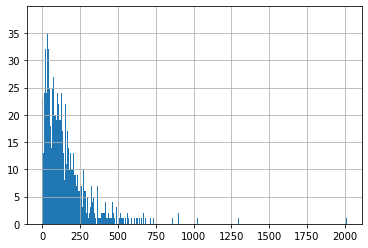

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.Series(len_arr).hist(bins=1000)
plt.show()


In [ ]:
len_arr.describe()

count    2638.000000
mean      148.885898
std       147.662182
min         0.000000
25%        53.250000
50%       109.000000
75%       193.750000
max      2011.000000
Name: commentsReview, dtype: float64

Most of the reviews are less than **500 words**

In [ ]:
y_train_review_sequence=y_train_review_df
y_test_review_sequence=y_test_review_df

In [ ]:
y_test_review_sequence

111      1
2992     9
3031     9
2686     3
2263    10
        ..
986      7
1779     1
2226     7
2793     8
1726    10
Name: rating, Length: 466, dtype: int64

In [ ]:
y_train_review_sequence

480      8
2819     2
309      8
2293     1
1725    10
        ..
1669     1
843     10
2119     8
3073     9
2325    10
Name: rating, Length: 2638, dtype: int64

In [ ]:
X_train_review_sequence.shape

(2638, 100)

In [ ]:

# Convolution
kernel_size = 5   
filters = 128
pool_size = 4


In [ ]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SpatialDropout1D,Conv1D,MaxPooling1D
embedding_size=100
vocabulary_size=VOC_SIZE
max_words=MAX_SEQUENCE_LENGTH
"""
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Dropout(0.15))
model.add(Conv1D(filters,kernel_size, padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(196, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()""" 
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(192, return_sequences=True))
model.add(Dense(128,activation='sigmoid'))
model.add(LSTM(128))
model.add(Dense(1, activation='relu'))
print(model.summary())

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 100, 100)          100000    
_________________________________________________________________
lstm_54 (LSTM)               (None, 100, 192)          225024    
_________________________________________________________________
dense_81 (Dense)             (None, 100, 128)          24704     
_________________________________________________________________
lstm_55 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 129       
Total params: 481,441
Trainable params: 481,441
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='mse', 
             optimizer='adam', 
             metrics=['accuracy'])

In [ ]:
batch_size = 32
num_epochs = 3
model.fit(X_train_review_sequence, y_train_review_sequence, validation_data=(X_test_review_sequence, y_test_review_sequence), batch_size=batch_size, epochs=num_epochs)

Epoch 1/3
30/83 [=========>....................] - ETA: 20s - loss: 59.8975 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
res=model.predict(X_train_review_sequence)

In [ ]:
res

array([[7.377654 ],
       [7.3774853],
       [7.3764153],
       ...,
       [7.3773756],
       [7.3770742],
       [7.3772144]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def get_performance_R(model,X,y):
  y_pred = model.predict(X)
  print("R2")
  print(r2_score(y, y_pred))
  print("MSE")
  print(mean_squared_error(y, y_pred))

In [ ]:
get_performance_R(model,X_train_review_sequence,y_train_review_sequence)

R2
-0.014821240135575398
MSE
8.695615445671363


In [ ]:
get_performance_R(model,X_test_review_sequence,y_test_review_sequence)

R2
-0.02167710410387058
MSE
9.177704969663527


# Categorical Data Preprocessing

One hot encoding

In [ ]:
strat_train_set.head()

,rating,effectiveness,sideEffects,commentsReview,rank_bin
480,8,Considerably Effective,Mild Side Effects,1 mg pill taken daily for hair loss on the cro...,1
2819,2,Ineffective,Mild Side Effects,Took Imitrex for a 3 month period and still ha...,0
309,8,Considerably Effective,Mild Side Effects,once a day at night time for a period of 3 mon...,1
2293,1,Ineffective,Extremely Severe Side Effects,This drug should NOT be on the market!,0
1725,10,Highly Effective,No Side Effects,At the start of this disorder I thought I was ...,1


Creating X_train and y_train

In [ ]:
X_train=strat_train_set[["effectiveness","sideEffects"]]

In [ ]:
X_train.head()

,effectiveness,sideEffects,rank_bin
480,Considerably Effective,Mild Side Effects,1
2819,Ineffective,Mild Side Effects,0
309,Considerably Effective,Mild Side Effects,1
2293,Ineffective,Extremely Severe Side Effects,0
1725,Highly Effective,No Side Effects,1


In [ ]:
y_train=strat_train_set["rating"]

In [ ]:
y_train.head()

480      8
2819     2
309      8
2293     1
1725    10
Name: rating, dtype: int64

Creating X_test and y_test

In [ ]:
X_test=strat_test_set[["effectiveness","sideEffects"]]

In [ ]:
strat_test_set

,rating,effectiveness,sideEffects,commentsReview,rank_bin
111,1,Ineffective,Severe Side Effects,When my cholesterol was found to be slightly e...,0
2992,9,Considerably Effective,No Side Effects,The treatment details are simply a taking one ...,1
3031,9,Considerably Effective,No Side Effects,Treatment has been ongoing for several months ...,1
2686,3,Ineffective,Moderate Side Effects,My dotor precribed this for treatment of whipl...,0
2263,10,Highly Effective,Mild Side Effects,"I was experiencing hot flashes, mood swings an...",1
...,...,...,...,...,...
986,7,Moderately Effective,Mild Side Effects,I began taking the product to stave off the on...,1
1779,1,Ineffective,Extremely Severe Side Effects,"i started at a very low dose, to be worked up ...",0
2226,7,Considerably Effective,Mild Side Effects,After being assessed by a psychiaterist using ...,1
2793,8,Highly Effective,Mild Side Effects,"It reduced the tingling sensation, and numbnes...",1


In [ ]:
X_test.head()

,effectiveness,sideEffects
111,Ineffective,Severe Side Effects
2992,Considerably Effective,No Side Effects
3031,Considerably Effective,No Side Effects
2686,Ineffective,Moderate Side Effects
2263,Highly Effective,Mild Side Effects


In [ ]:
y_test=strat_test_set["rating"]

In [ ]:
y_test.head()

111      1
2992     9
3031     9
2686     3
2263    10
Name: rating, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False,drop='first'),[0,1])])

In [ ]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [ ]:
X_train=pd.DataFrame(data=X_train,columns=ct.get_feature_names())
X_test=pd.DataFrame(data=X_test,columns=ct.get_feature_names())

In [ ]:
X_train.head()

,encoder__x0_Highly Effective,encoder__x0_Ineffective,encoder__x0_Marginally Effective,encoder__x0_Moderately Effective,encoder__x1_Mild Side Effects,encoder__x1_Moderate Side Effects,encoder__x1_No Side Effects,encoder__x1_Severe Side Effects
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Merged:Categorical Data Preprocessing

One hot encoding

In [ ]:
strat_train_set.head()

,rating,effectiveness,sideEffects,commentsReview,rank_bin
1542,10,Highly Effective,No Side Effects,I had a heart scan after experiencing exercise...,1
1888,9,Highly Effective,Mild Side Effects,Prescribed for adult ADD. I take one per day -...,1
2395,7,Moderately Effective,Moderate Side Effects,After starting at.325mg-1.5 dose and now up to...,1
1362,8,Considerably Effective,Mild Side Effects,Taken on a daily basis at the same time everyd...,1
2856,8,Considerably Effective,No Side Effects,I took it once a day.. in the beginning it wor...,1


Creating X_train and y_train

In [ ]:
X_train=strat_train_set[["effectiveness","sideEffects","rank_bin"]]

In [ ]:
X_train.head()

,effectiveness,sideEffects,rank_bin
1542,Highly Effective,No Side Effects,1
1888,Highly Effective,Mild Side Effects,1
2395,Moderately Effective,Moderate Side Effects,1
1362,Considerably Effective,Mild Side Effects,1
2856,Considerably Effective,No Side Effects,1


In [ ]:
y_train=strat_train_set["rating"]

In [ ]:
y_train.head()

1542    10
1888     9
2395     7
1362     8
2856     8
Name: rating, dtype: int64

Creating X_test and y_test

In [ ]:
X_test=strat_test_set[["effectiveness","sideEffects","rank_bin"]]

In [ ]:
X_test.head()

,effectiveness,sideEffects,rank_bin
214,Highly Effective,Moderate Side Effects,1
1814,Considerably Effective,No Side Effects,0
2347,Highly Effective,Mild Side Effects,1
3035,Highly Effective,Moderate Side Effects,1
457,Highly Effective,No Side Effects,1


Merging test result from previous model

In [ ]:
for i, row in tqdm(X_test.iterrows()):
  X_test.at[i,'rank_bin']=y_test_pred_index[i]


932it [00:00, 10280.16it/s]


In [ ]:
y_test_pred_index

214     1
1814    0
2347    1
3035    1
457     1
       ..
1160    0
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

In [ ]:
y_test=strat_test_set["rating"]

In [ ]:
y_test.head()

214      8
1814     6
2347     9
3035     9
457     10
Name: rating, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False,drop='first'),[0,1,2])])

In [ ]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [ ]:
X_train=pd.DataFrame(data=X_train,columns=ct.get_feature_names())
X_test=pd.DataFrame(data=X_test,columns=ct.get_feature_names())

In [ ]:
X_train.head()

,encoder__x0_Highly Effective,encoder__x0_Ineffective,encoder__x0_Marginally Effective,encoder__x0_Moderately Effective,encoder__x1_Mild Side Effects,encoder__x1_Moderate Side Effects,encoder__x1_No Side Effects,encoder__x1_Severe Side Effects,encoder__x2_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Categorical Model: Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [600],
    'max_features': [5,6,7,8],
#    'max_features':['auto', 'sqrt'],

    'min_samples_leaf': [2,4,8,10,15],
    'min_samples_split': [10,20,40,50],
    'n_estimators': [25,50,100,200,300]
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
model=grid_search.best_estimator_

In [ ]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=600, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Performance

In [ ]:
def get_performance_R(model,X,y):
  y_pred = model.predict(X)
  from sklearn.metrics import r2_score
  print(r2_score(y, y_pred))

get_performance_R(model,X_train,y_train)


0.8152236719781827


In [ ]:
get_performance_R(model,X_test,y_test)


0.7800987150357324


In [ ]:
X_train.columns.to_list()

['encoder__x0_Highly Effective',
 'encoder__x0_Ineffective',
 'encoder__x0_Marginally Effective',
 'encoder__x0_Moderately Effective',
 'encoder__x1_Mild Side Effects',
 'encoder__x1_Moderate Side Effects',
 'encoder__x1_No Side Effects',
 'encoder__x1_Severe Side Effects',
 'encoder__x2_1']

In [ ]:
for name, score in zip(X_train.columns.to_list(), model.feature_importances_):
  print(name, score)

encoder__x0_Highly Effective 0.22443885678194825
encoder__x0_Ineffective 0.24733092951151006
encoder__x0_Marginally Effective 0.058953843681018914
encoder__x0_Moderately Effective 0.030566943644427504
encoder__x1_Mild Side Effects 0.05759007502899823
encoder__x1_Moderate Side Effects 0.03923817202940952
encoder__x1_No Side Effects 0.04898479352907678
encoder__x1_Severe Side Effects 0.09328735094826511
encoder__x2_1 0.19960903484534573


# Merged Prediction

In [2]:
!git checkout --orphan master

fatal: not a git repository (or any of the parent directories): .git


In [4]:
!pwd

/content


In [6]:
!mkdir p4

In [7]:
!cd p4

In [8]:
!ls

p4  sample_data
